# 2 Grid-base processing framework of TransBigData

This notebook will introduce the core functions embedded in the Transbigdata package

In [1]:
import transbigdata as tbd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import random

In [2]:
# this is a shp file, the sample area is part of Jiading district, Shanghai, China
jiading_polygon = gpd.read_file(r'data/jiading_polygon/jiading_polygon.shp')
jiading_polygon.head() 

,id,geometry
0,1,"POLYGON ((121.22538 31.35142, 121.22566 31.350..."


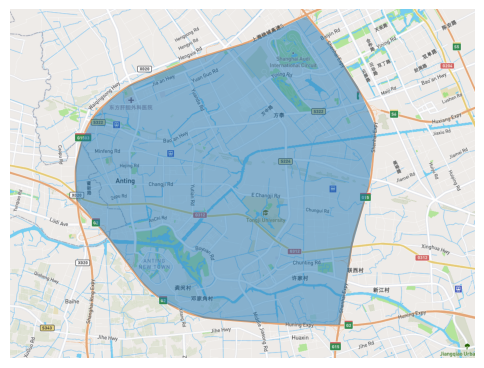

In [3]:
jiading_rec_bound = [121.1318, 31.2484, 121.2553, 31.3535]

fig = plt.figure(1, (6, 6), dpi=100)
ax = plt.subplot(111)
plt.sca(ax)
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)

jiading_polygon.plot(ax=ax, alpha=0.5)
plt.axis('off');

## `transbigdata.area_to_grid`(location, accuracy=500, method='rect', params='auto')

In [4]:
# generate the default grid
grid_rec, params_rec = tbd.area_to_grid(jiading_polygon)
pprint.pprint(params_rec)
grid_rec.head()

{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'rect',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


,LONCOL,LATCOL,geometry
171,9,0,"POLYGON ((121.18270 31.24943, 121.18797 31.249..."
174,10,0,"POLYGON ((121.18797 31.24943, 121.19323 31.249..."
177,11,0,"POLYGON ((121.19323 31.24943, 121.19849 31.249..."
180,12,0,"POLYGON ((121.19849 31.24943, 121.20375 31.249..."
183,13,0,"POLYGON ((121.20375 31.24943, 121.20902 31.249..."


In [5]:
# generate triangle grid
grid_tri, params_tri = tbd.area_to_grid(jiading_polygon, method='tri')  # to do: bug need to be fixed here
pprint.pprint(params_tri)
grid_tri.head()

{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'tri',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


,loncol_1,loncol_2,loncol_3,geometry
22,6,2,-5,"POLYGON ((121.17481 31.25947, 121.16955 31.256..."
24,7,2,-5,"POLYGON ((121.17481 31.25428, 121.18007 31.256..."
27,8,3,-5,"POLYGON ((121.18007 31.25168, 121.18533 31.254..."
28,8,3,-6,"POLYGON ((121.18533 31.25947, 121.18007 31.256..."
30,9,3,-6,"POLYGON ((121.18533 31.25428, 121.19060 31.256..."


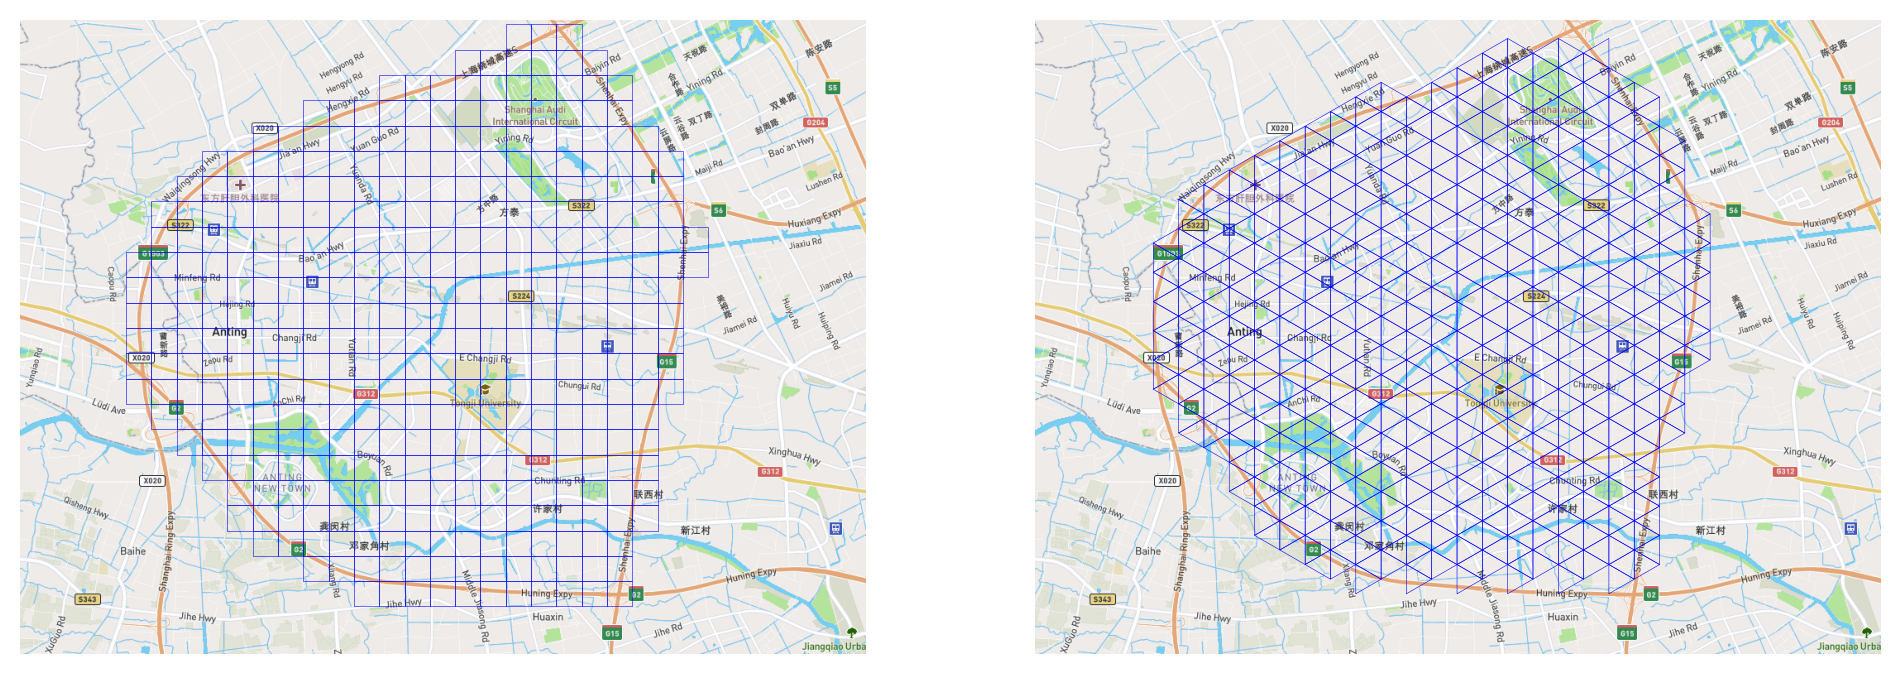

In [6]:
# Visualization
fig = plt.figure(1, (12, 8), dpi=200)
ax1 = plt.subplot(121)
plt.sca(ax1)
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)
grid_rec.plot(ax=ax1, lw=0.2, edgecolor='blue', facecolor="None")

plt.axis('off');

ax2 = plt.subplot(122)
plt.sca(ax2)
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)
grid_tri.plot(ax=ax2, lw=0.2, edgecolor='blue', facecolor="None")

plt.axis('off');

## `transbigdata.area_to_params`(location, accuracy=500, method='rect')

Sometime, due to data sparisity, we do not need to generate all the grids. In such case, we can use `transbigdata.area_to_params`.  

This method only creat a dictionary file for the grid, thus is much faster.

In [7]:
params = tbd.area_to_params(jiading_polygon)
pprint.pprint(params)

{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'rect',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


## `transbigdata.GPS_to_grid`(lon, lat, params)

The next common step is to know which grid does each trajectory point belong to.

In [8]:
# First, we generate some random GPS points (20 points in this case)

lon_list, lat_list = [], []
for i in range(20): 
    gps_lon = random.uniform(jiading_rec_bound[0], jiading_rec_bound[2]) 
    gps_lat = random.uniform(jiading_rec_bound[1], jiading_rec_bound[3]) 
    lon_list.append(gps_lon) 
    lat_list.append(gps_lat) 
    
gps_random = pd.DataFrame({'veh_id': range(20),
                           'lon': lon_list,
                           'lat': lat_list,
                          })

gps_random.head()

,veh_id,lon,lat
0,0,121.204726,31.266296
1,1,121.168077,31.326952
2,2,121.142706,31.315498
3,3,121.215899,31.339561
4,4,121.217937,31.269540


In [9]:
# match each point to the rect grid
gps_random['LonCol'], gps_random['LatCol'] = tbd.GPS_to_grid(gps_random['lon'], gps_random['lat'], params_rec)

gps_random.head()

,veh_id,lon,lat,LonCol,LatCol
0,0,121.204726,31.266296,13,3
1,1,121.168077,31.326952,6,17
2,2,121.142706,31.315498,1,14
3,3,121.215899,31.339561,15,20
4,4,121.217937,31.269540,15,4


## `transbigdata.grid_to_centre`(gridid, params)

The center location of each grid can acquired using `transbigdata.grid_to_centre`

In [10]:
# Use the matched grid as example
gps_random['LonGridCenter'], gps_random['LatGridCenter'] = \
tbd.grid_to_centre([gps_random['LonCol'], gps_random['LatCol']], params_rec)

# check the matched results
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter
0,0,121.204726,31.266296,13,3,121.206385,31.265172
1,1,121.168077,31.326952,6,17,121.169547,31.328124
2,2,121.142706,31.315498,1,14,121.143234,31.314634
3,3,121.215899,31.339561,15,20,121.216910,31.341614
4,4,121.217937,31.269540,15,4,121.216910,31.269668


## `transbigdata.grid_to_polygon`(gridid, params)

For visualization convenience, grid parameters can be transformed into `geometry` format

In [11]:
# Use the matched grid as example again
gps_random['grid_geo_polygon'] = tbd.grid_to_polygon([gps_random['LonCol'], gps_random['LatCol']], params_rec)

# check the matched results
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter,grid_geo_polygon
0,0,121.204726,31.266296,13,3,121.206385,31.265172,POLYGON ((121.2037536619401 31.262923341425626...
1,1,121.168077,31.326952,6,17,121.169547,31.328124,POLYGON ((121.16691542701707 31.32587581431555...
2,2,121.142706,31.315498,1,14,121.143234,31.314634,POLYGON ((121.14060240207206 31.31238599869628...
3,3,121.215899,31.339561,15,20,121.216910,31.341614,POLYGON ((121.2142788719181 31.339365629934818...
4,4,121.217937,31.269540,15,4,121.216910,31.269668,"POLYGON ((121.2142788719181 31.26741994663205,..."


## `transbigdata.grid_to_area`(data, shape, params, col=['LONCOL', 'LATCOL'])

In addition to grid, there might be several districts. `transbigdata.grid_to_area` can be used to match the information.  

In this case, there are only one district in `jiading_polygon`, the matched column is `id`.

In [12]:
gps_matched = tbd.grid_to_area(gps_random, jiading_polygon, params_rec, col=['LonCol', 'LatCol'])

# check the matched results
gps_matched.head()

/Applications/anaconda3/envs/tbd/lib/python3.9/site-packages/transbigdata/grids.py:421: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  data1 = gpd.sjoin(data1, shape)


,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter,grid_geo_polygon,geometry,index_right,id
0,0,121.204726,31.266296,13,3,121.206385,31.265172,POLYGON ((121.2037536619401 31.262923341425626...,POINT (121.20638 31.26517),0,1
1,1,121.168077,31.326952,6,17,121.169547,31.328124,POLYGON ((121.16691542701707 31.32587581431555...,POINT (121.16955 31.32812),0,1
2,2,121.142706,31.315498,1,14,121.143234,31.314634,POLYGON ((121.14060240207206 31.31238599869628...,POINT (121.14323 31.31463),0,1
3,3,121.215899,31.339561,15,20,121.216910,31.341614,POLYGON ((121.2142788719181 31.339365629934818...,POINT (121.21691 31.34161),0,1
4,4,121.217937,31.269540,15,4,121.216910,31.269668,"POLYGON ((121.2142788719181 31.26741994663205,...",POINT (121.21691 31.26967),0,1


## `transbigdata.grid_to_params`(grid)

A useful tool to get grid params from grid geometry

In [13]:
# this is the formal grid geometry 
grid_rec.head() 

,LONCOL,LATCOL,geometry
171,9,0,"POLYGON ((121.18270 31.24943, 121.18797 31.249..."
174,10,0,"POLYGON ((121.18797 31.24943, 121.19323 31.249..."
177,11,0,"POLYGON ((121.19323 31.24943, 121.19849 31.249..."
180,12,0,"POLYGON ((121.19849 31.24943, 121.20375 31.249..."
183,13,0,"POLYGON ((121.20375 31.24943, 121.20902 31.249..."


In [14]:
tbd.grid_to_params(grid_rec)

{'slon': 121.13797109957761,
 'slat': 31.25168182840957,
 'deltalon': 0.005262604988999442,
 'deltalat': 0.0044966052064197015,
 'theta': 0,
 'method': 'rect'}

## `transbigdata.grid_params_optimize`(data, initialparams, col=['uid', 'lon', 'lat'], optmethod='centerdist', printlog=False, sample=0)

Offers several methods to optimize the grids

This method relies on the `scikit-opt` package. To do so, please run following code in cmd: 

```
pip install scikit-opt
```

For more details of this method, please refer to this [notebook](https://github.com/ni1o1/transbigdata/blob/main/example/Example%206-Optimize%20grid%20params.ipynb).

In [15]:
# we use the random generated data again
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter,grid_geo_polygon
0,0,121.204726,31.266296,13,3,121.206385,31.265172,POLYGON ((121.2037536619401 31.262923341425626...
1,1,121.168077,31.326952,6,17,121.169547,31.328124,POLYGON ((121.16691542701707 31.32587581431555...
2,2,121.142706,31.315498,1,14,121.143234,31.314634,POLYGON ((121.14060240207206 31.31238599869628...
3,3,121.215899,31.339561,15,20,121.216910,31.341614,POLYGON ((121.2142788719181 31.339365629934818...
4,4,121.217937,31.269540,15,4,121.216910,31.269668,"POLYGON ((121.2142788719181 31.26741994663205,..."


Optimized index centerdist: 116.11243965546235
Optimized gridding params: {'slon': 121.14169760115118, 'slat': 31.252579076220087, 'deltalon': 0.005262604989003139, 'deltalat': 0.004496605206422906, 'theta': 50.91831009508256, 'method': 'rect'}
Optimizing cost:


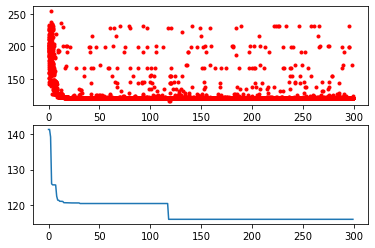

Result:


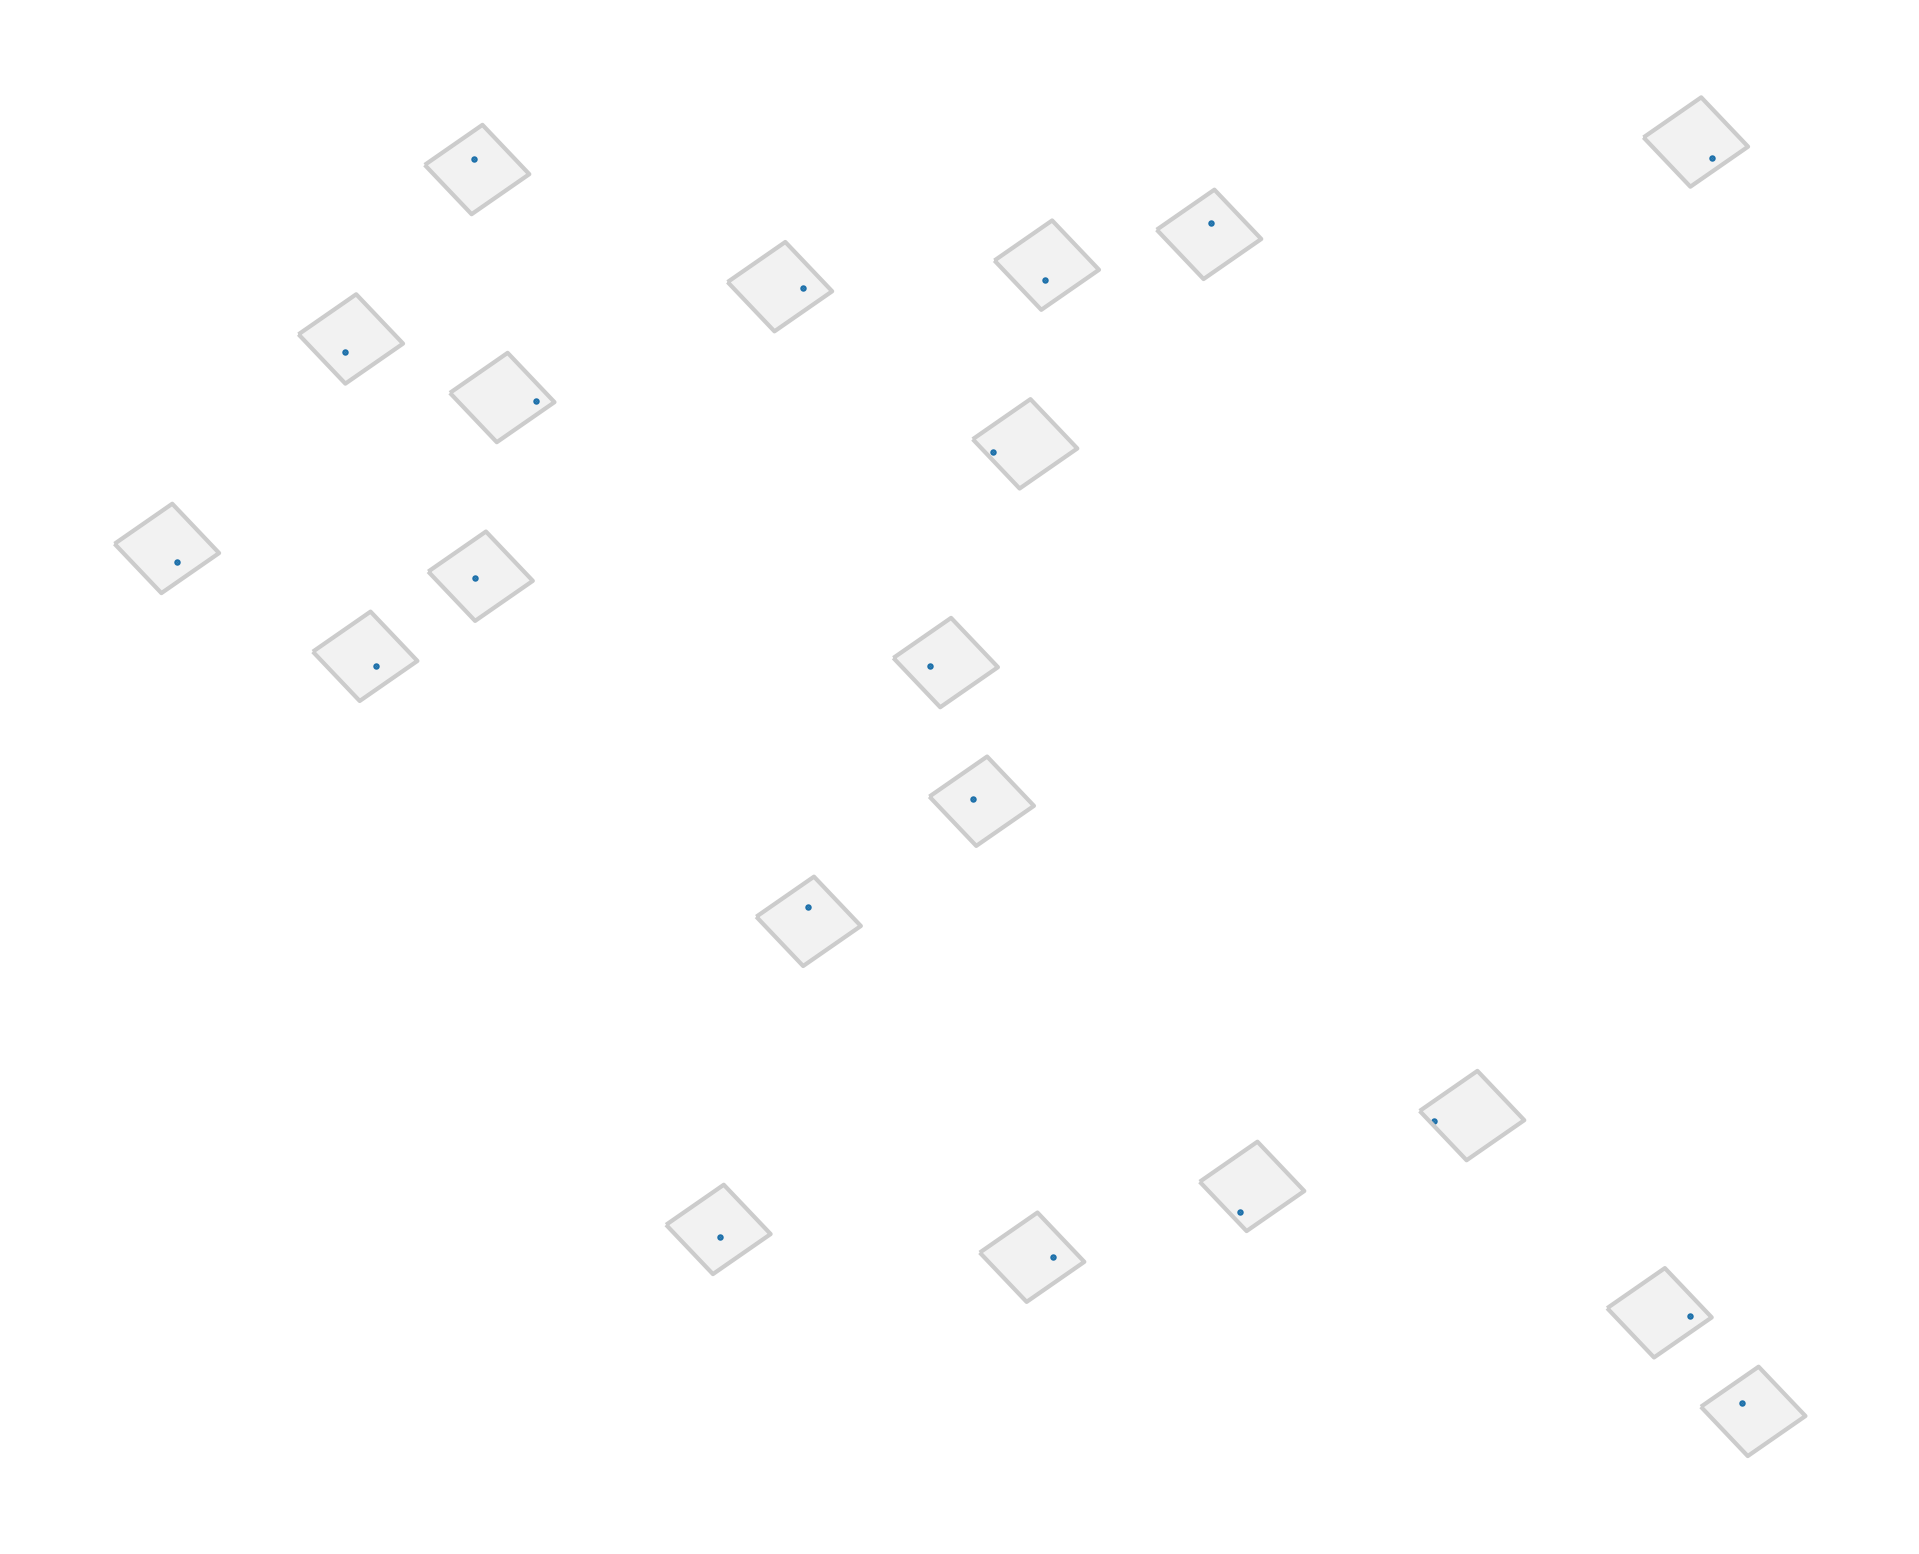

{'slon': 121.14169760115118,
 'slat': 31.252579076220087,
 'deltalon': 0.005262604989003139,
 'deltalat': 0.004496605206422906,
 'theta': 50.91831009508256,
 'method': 'rect'}

In [16]:
tbd.grid_params_optimize(gps_random, params_rec, col=['veh_id', 'lon', 'lat'],printlog=True)